# Telco customer churn

In [1]:
# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import pandas_profiling
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
sns.set_palette("viridis")
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
pd.options.display.max_columns = None
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [3]:
# Shape of the data set
print('The archive has '+str(df.shape[1])+' columns and '+str(df.shape[0])+' rows')

The archive has 21 columns and 7043 rows


## Data treatment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have to change the data type for TotalCharges from "Object" to "float".

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# Let's check on null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

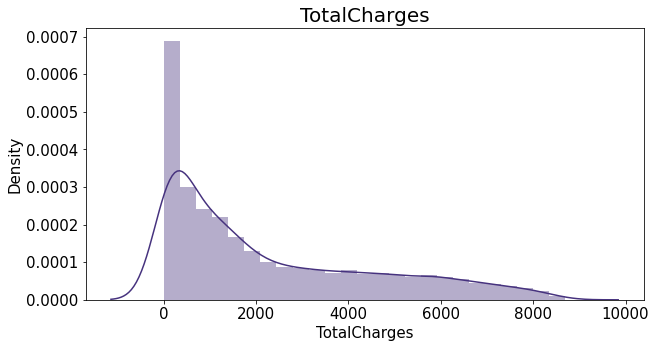

In [7]:
# Total Charges
plt.figure(figsize=(10, 5))
sns.distplot(df['TotalCharges']) 
plt.title('TotalCharges', fontsize = 20, fontweight = 10)
plt.xlabel('TotalCharges', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [8]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [9]:
# Let's check on null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
columns_list = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

print(df.gender.unique())
print(df.SeniorCitizen.unique())
print(df.Partner.unique())
print(df.Dependents.unique())
print(df.tenure.unique())
print(df.PhoneService.unique())
print(df.MultipleLines.unique())
print(df.InternetService.unique())
print(df.OnlineSecurity.unique())
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.TechSupport.unique())
print(df.StreamingTV.unique())
print(df.StreamingMovies.unique())
print(df.Contract.unique())
print(df.PaperlessBilling.unique())
print(df.PaymentMethod.unique())
print(df.MonthlyCharges.unique())
print(df.TotalCharges.unique())
print(df.Churn.unique())


['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


## Exploratory Data Analysis

Text(0, 0.5, 'Number of observationss')

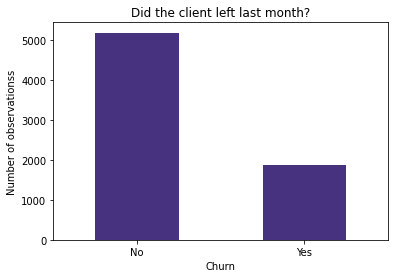

In [12]:
# Let's first see in our dataset how many clients left and how many stayed.
count_classes = pd.value_counts(df['Churn'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Did the client left last month?")
plt.xlabel("Churn")
plt.ylabel("Number of observationss")

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


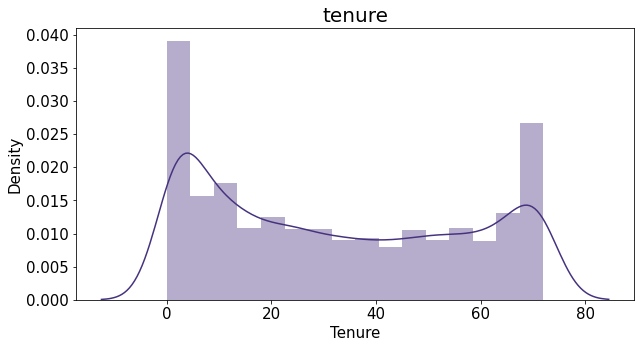

In [14]:
# Checking the tenure distribution from clients
plt.figure(figsize=(10, 5))
sns.distplot(df['tenure']) 
plt.title('tenure', fontsize = 20, fontweight = 10)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

This variable has a bimodal distribution, having an stable value between 15 and 60 months, and peaks around the 5 and 70 months values.

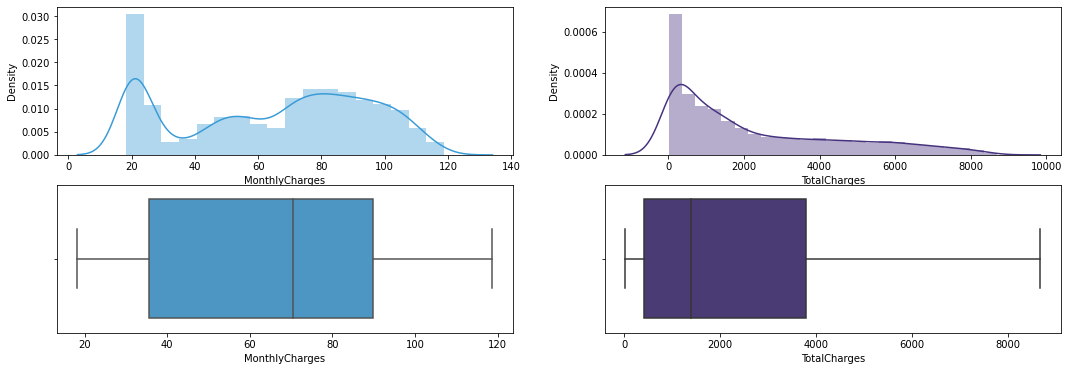

In [15]:
# What about the monthly and total charges
fig, axs = plt.subplots(2, 2, figsize=(18, 6))
sns.distplot(df['MonthlyCharges'], ax=axs[0, 0], kde=True, color='#3A9BD6')
sns.boxplot(df['MonthlyCharges'], ax=axs[1, 0], color='#3A9BD6')
sns.distplot(df['TotalCharges'], ax=axs[0, 1], kde=True)
sns.boxplot(df['TotalCharges'], ax=axs[1, 1])
plt.show()

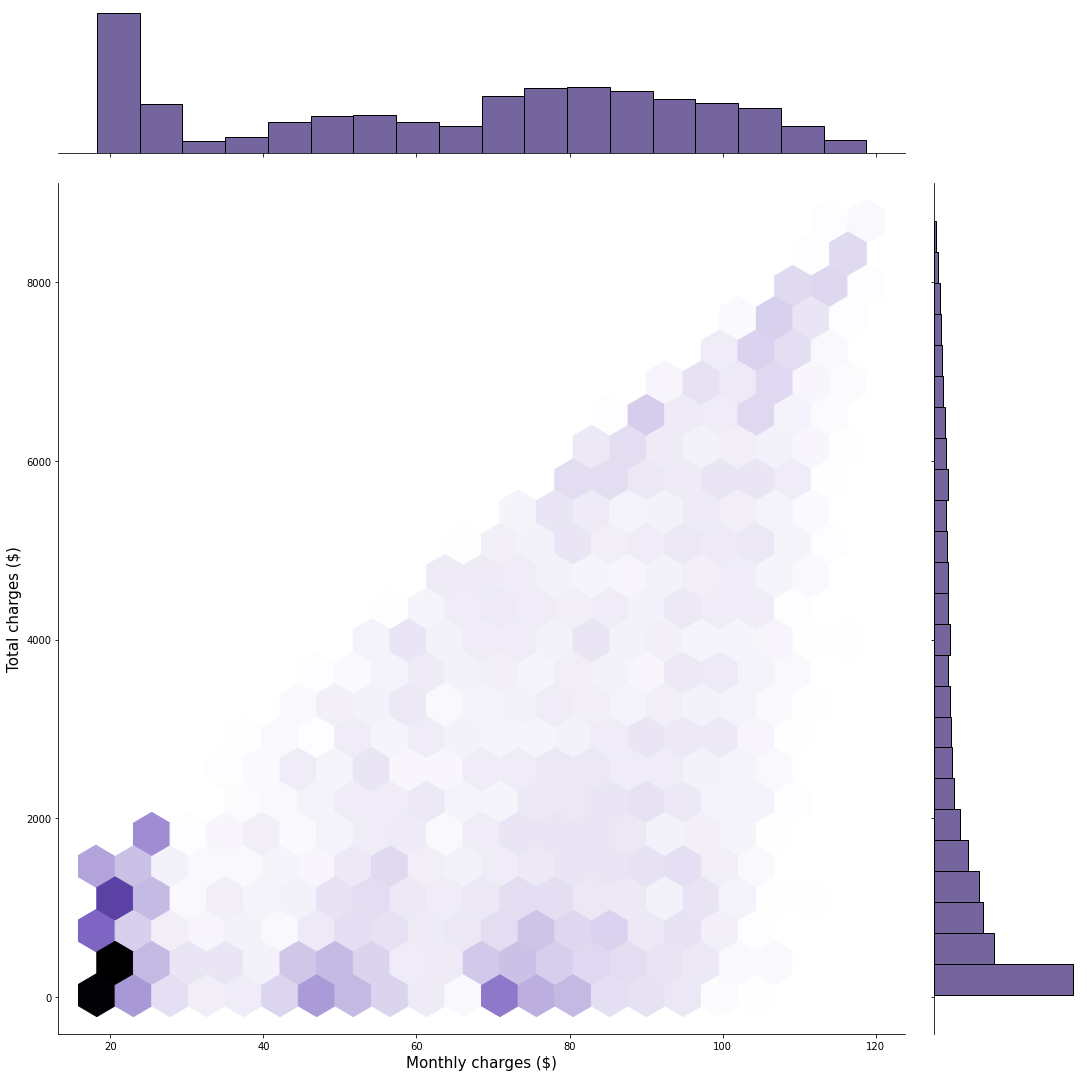

In [16]:
# We should have a linear relationship between this two variables
sns.jointplot(x=df['MonthlyCharges'], y=df['TotalCharges'], kind = 'hex', height = 15)
plt.xlabel('Monthly charges ($)', fontsize = 15)
plt.ylabel('Total charges ($)', fontsize = 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

It seems that the clients that pay the less are also the ones that have just started their subscrption. Lets see how these variables behave related to the tenure.

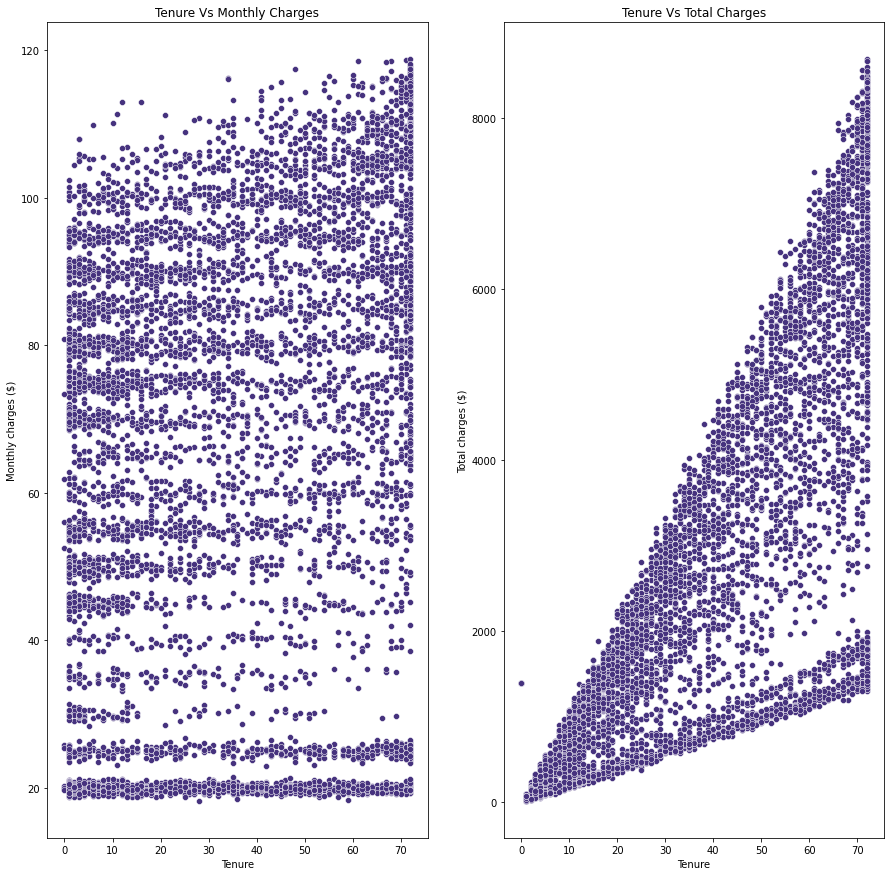

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
sns.scatterplot(x=df['tenure'], y=df['MonthlyCharges'], ax=axs[0])
axs[0].set(title = 'Tenure Vs Monthly Charges', xlabel='Tenure', ylabel='Monthly charges ($)')
sns.scatterplot(x=df['tenure'], y=df['TotalCharges'], ax=axs[1])
axs[1].set(title = 'Tenure Vs Total Charges', xlabel='Tenure', ylabel='Total charges ($)')
plt.show()

It is obvious that the longer an user has been a client the bigger its total charges shoulb be, never the less is quiter hard to visualize if the Monthly charge has an impact on the tenures. Lets see more about that.

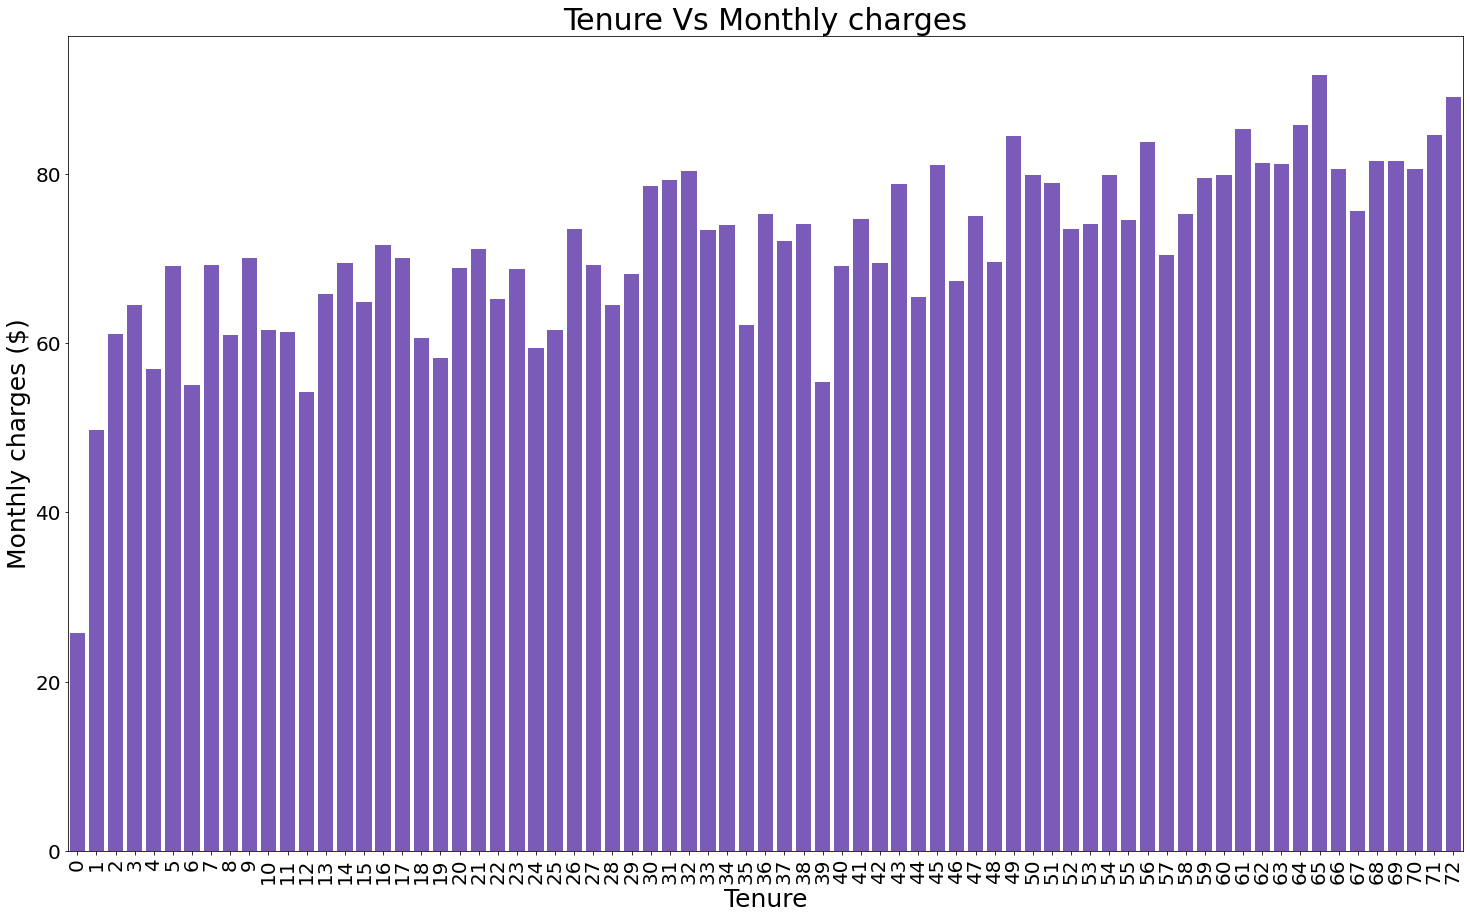

In [18]:
tenure_charge = df.groupby('tenure').MonthlyCharges.median().to_frame(name='Monthly charge').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=tenure_charge['tenure'], y=tenure_charge['Monthly charge'], color='#764BC8')
plt.title("Tenure Vs Monthly charges", fontsize = 30, fontweight = 20)
plt.xlabel("Tenure", fontsize = 25)
plt.ylabel('Monthly charges ($)', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation = 90)
plt.show()

Although is just slightly, it seems that the longer an user has been a client, the higher is its monthly payment. Now, lets see the relationship between the monthly payment, tenure and the contracted services.

In [19]:
# First, let see the distribution for type of contract
contract_count = df.groupby('Contract').customerID.count().to_frame(name='Count').reset_index()
contract_count['%'] = (contract_count['Count']/(contract_count['Count'].sum()))*100
contract_count

,Contract,Count,%
0,Month-to-month,3875,55.019168
1,One year,1473,20.914383
2,Two year,1695,24.066449


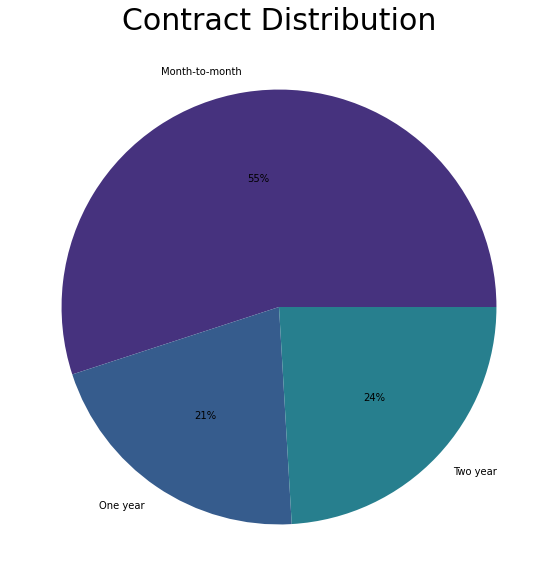

In [20]:
plt.figure(figsize=(15, 10))
data = contract_count['%']
labels = contract_count['Contract']
colors = sns.color_palette('viridis')[0:3]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Contract Distribution", fontsize = 30, fontweight = 20)
plt.show()

         Contract  Monthly charge
0  Month-to-month           73.25
1        One year           68.75
2        Two year           64.35


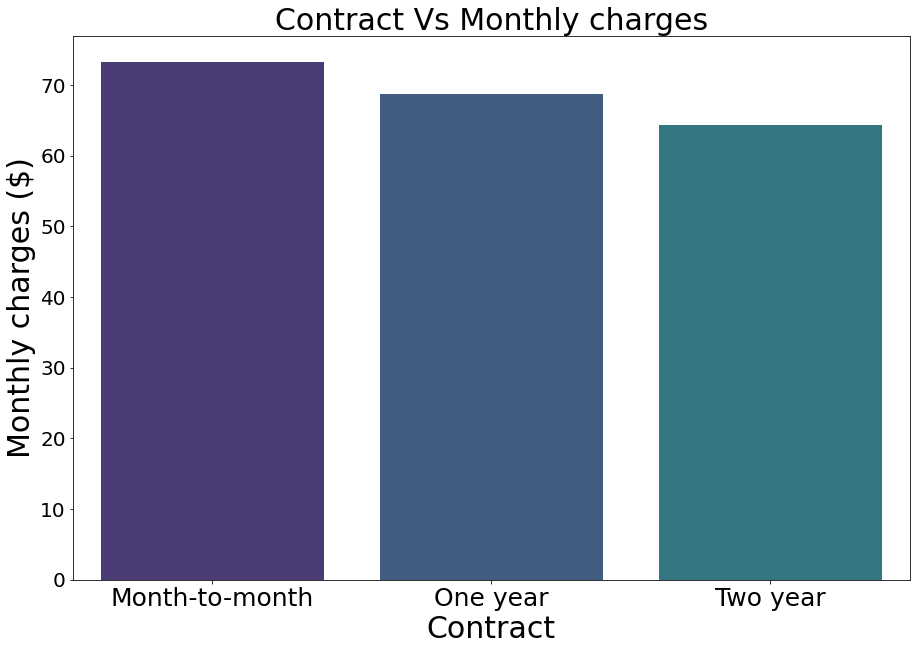

In [21]:
# Contract
contract_charge = df.groupby('Contract').MonthlyCharges.median().to_frame(name='Monthly charge').reset_index()
print(contract_charge)
plt.figure(figsize=(15, 10))
sns.barplot(x=contract_charge['Contract'], y=contract_charge['Monthly charge'])
plt.title("Contract Vs Monthly charges", fontsize = 30, fontweight = 20)
plt.xlabel("Contract", fontsize = 30)
plt.ylabel('Monthly charges ($)', fontsize = 30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=25)
plt.show()

As expected, the longer the contract, the less the client has to pay per month. But how related is the tenure with the type of contract?

         Contract  Tenure median
0  Month-to-month           12.0
1        One year           44.0
2        Two year           64.0


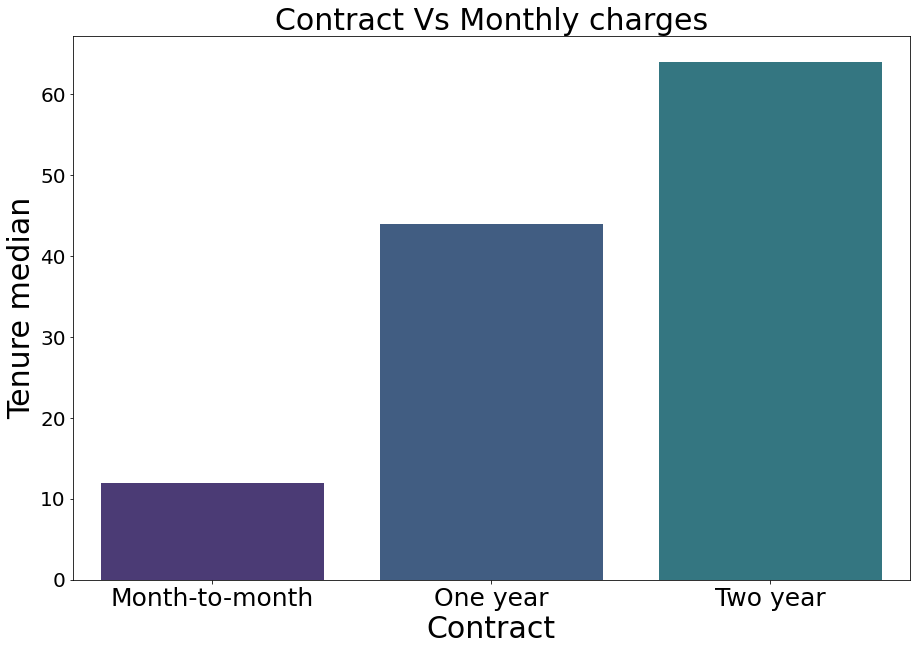

In [22]:
# Contract
contract_tenure = df.groupby('Contract').tenure.median().to_frame(name='Tenure median').reset_index()
print(contract_tenure)
plt.figure(figsize=(15, 10))
sns.barplot(x=contract_tenure['Contract'], y=contract_tenure['Tenure median'])
plt.title("Contract Vs Monthly charges", fontsize = 30, fontweight = 20)
plt.xlabel("Contract", fontsize = 30)
plt.ylabel('Tenure median', fontsize = 30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=25)
plt.show()

Clients that signed a month-to-month contract tend to stay around a year, meaning that if they have choosen on first placed to signed a one year contract they would have saved about 50$ that year. Meanwhile, on-year contract clients tend to stay almost four years, while two-year contracts most usualy last around 5 years and a half. Lets take a look at services.

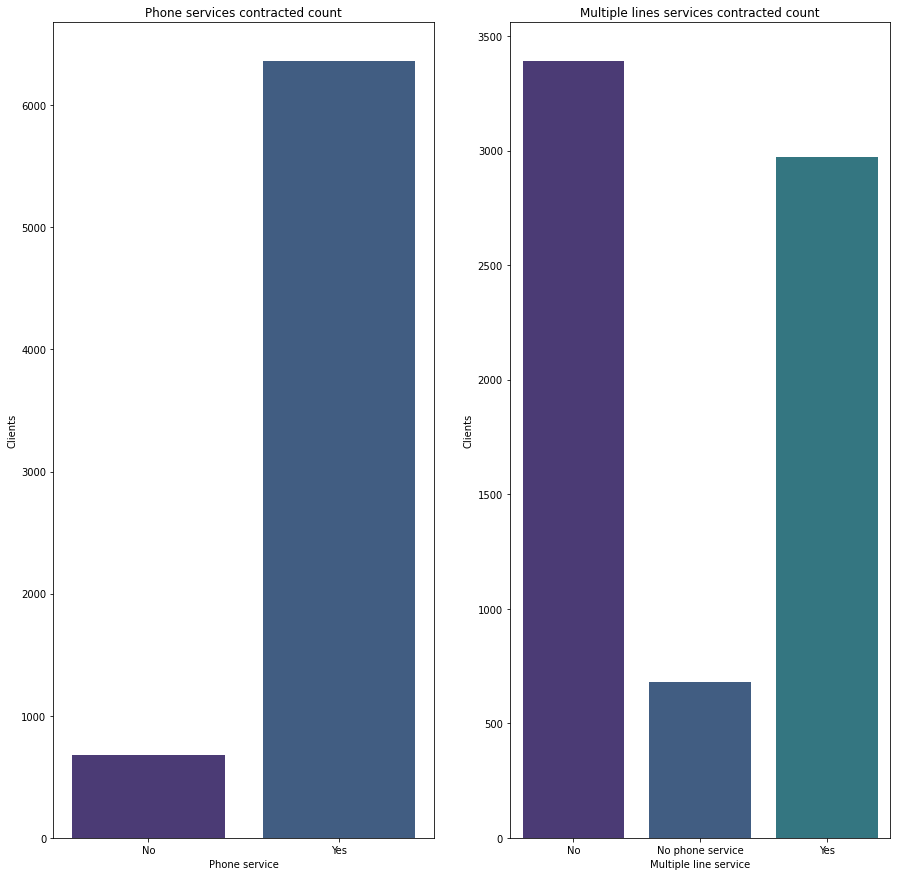

In [23]:
# Phone service
PhoneService_count = df.groupby('PhoneService').customerID.count().to_frame(name='Count').reset_index()
MultipleLines_count = df.groupby('MultipleLines').customerID.count().to_frame(name='Count').reset_index()
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
sns.barplot(x=PhoneService_count['PhoneService'], y=PhoneService_count['Count'], ax=axs[0])
axs[0].set(title = 'Phone services contracted count', xlabel='Phone service', ylabel='Clients')
sns.barplot(x=MultipleLines_count['MultipleLines'], y=MultipleLines_count['Count'], ax=axs[1])
axs[1].set(title = 'Multiple lines services contracted count', xlabel='Multiple line service', ylabel='Clients')
plt.show()

Among the clients that have a phone service contracted, most of then only have one line. What about internet service?

In [24]:
InternetService_count = df.groupby('InternetService').customerID.count().to_frame(name='Count').reset_index()
InternetService_count['%'] = (InternetService_count['Count']/(InternetService_count['Count'].sum()))*100
InternetService_count

,InternetService,Count,%
0,DSL,2421,34.374556
1,Fiber optic,3096,43.958540
2,No,1526,21.666903


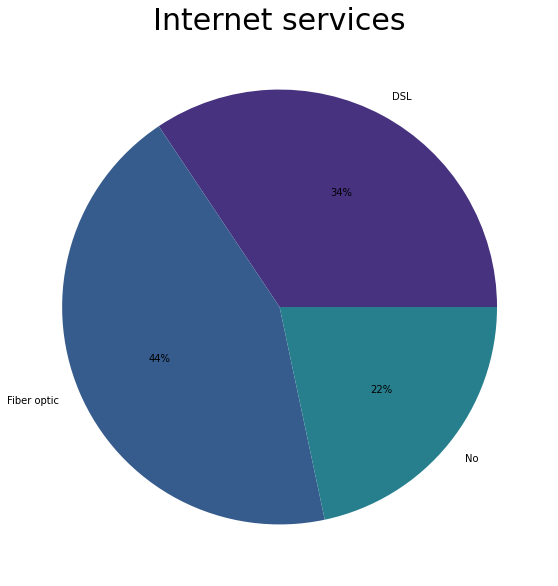

In [25]:
plt.figure(figsize=(15, 10))
data = InternetService_count['%']
labels = InternetService_count['InternetService']
colors = sns.color_palette('viridis')[0:3]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Internet services", fontsize = 30, fontweight = 20)
plt.show()

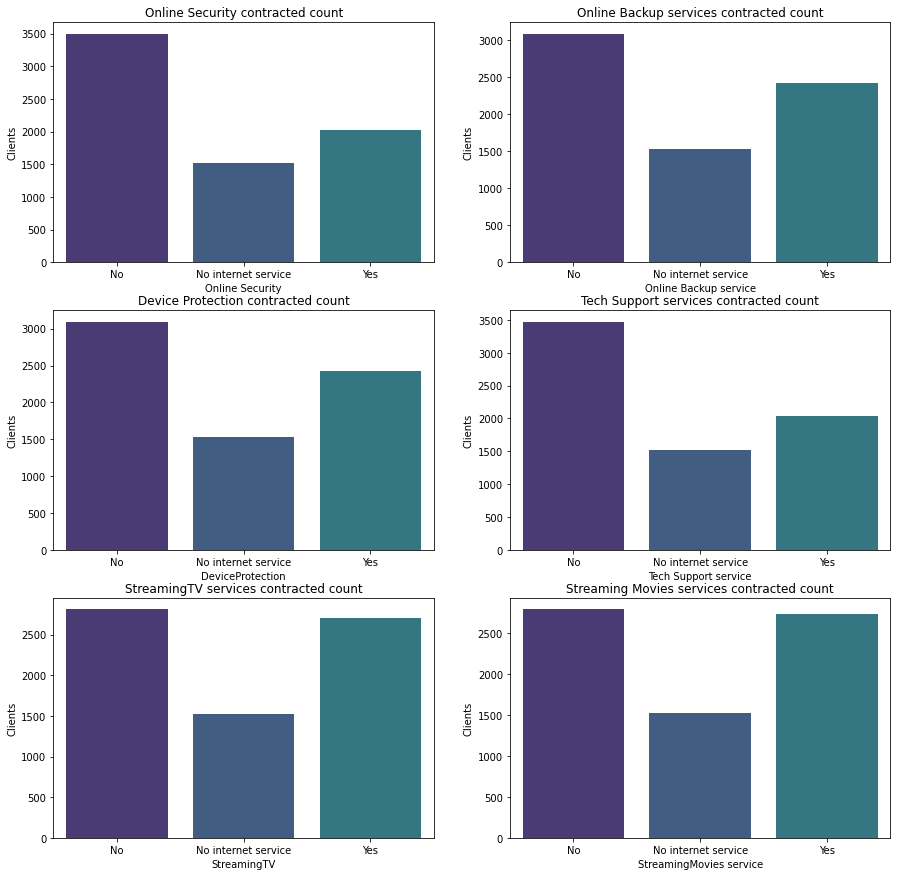

In [26]:
OnlineSecurity_count = df.groupby('OnlineSecurity').customerID.count().to_frame(name='Count').reset_index()
OnlineBackup_count = df.groupby('OnlineBackup').customerID.count().to_frame(name='Count').reset_index()
DeviceProtection_count = df.groupby('DeviceProtection').customerID.count().to_frame(name='Count').reset_index()
TechSupport_count = df.groupby('TechSupport').customerID.count().to_frame(name='Count').reset_index()
StreamingTV_count = df.groupby('StreamingTV').customerID.count().to_frame(name='Count').reset_index()
StreamingMovies_count = df.groupby('StreamingMovies').customerID.count().to_frame(name='Count').reset_index()

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(x=OnlineSecurity_count['OnlineSecurity'], y=OnlineSecurity_count['Count'], ax=axs[0, 0])
axs[0, 0].set(title = 'Online Security contracted count', xlabel='Online Security', ylabel='Clients')

sns.barplot(x=OnlineBackup_count['OnlineBackup'], y=OnlineBackup_count['Count'], ax=axs[0, 1])
axs[0, 1].set(title = 'Online Backup services contracted count', xlabel='Online Backup service', ylabel='Clients')

sns.barplot(x=DeviceProtection_count['DeviceProtection'], y=DeviceProtection_count['Count'], ax=axs[1, 0])
axs[1, 0].set(title = 'Device Protection contracted count', xlabel='DeviceProtection', ylabel='Clients')

sns.barplot(x=TechSupport_count['TechSupport'], y=TechSupport_count['Count'], ax=axs[1, 1])
axs[1, 1].set(title = 'Tech Support services contracted count', xlabel='Tech Support service', ylabel='Clients')

sns.barplot(x=StreamingTV_count['StreamingTV'], y=StreamingTV_count['Count'], ax=axs[2, 0])
axs[2, 0].set(title = 'StreamingTV services contracted count', xlabel='StreamingTV', ylabel='Clients')

sns.barplot(x=StreamingMovies_count['StreamingMovies'], y=StreamingMovies_count['Count'], ax=axs[2, 1])
axs[2, 1].set(title = 'Streaming Movies services contracted count', xlabel='StreamingMovies service', ylabel='Clients')
plt.show()

From the internet side services the most commonly contracted are stream services (TV and Movies), while Tech Suport and online security are the least contracted. Now, we are going to check on the demographics.

In [27]:
# Gender
# First, let see the distribution for type of contract
gender_count = df.groupby('gender').customerID.count().to_frame(name='Count').reset_index()
gender_count['%'] = (gender_count['Count']/(gender_count['Count'].sum()))*100
gender_count

,gender,Count,%
0,Female,3488,49.52435
1,Male,3555,50.47565


The sample is really balanced, what about how they stay and how much do they spent.

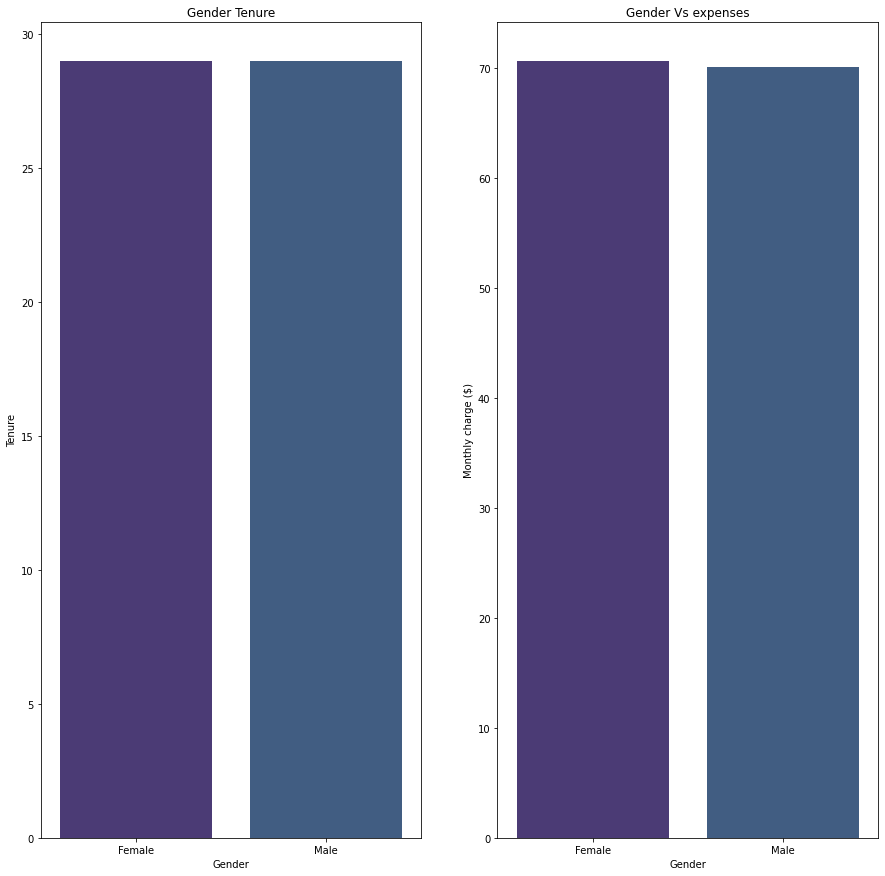

In [28]:
gender_tenure = df.groupby('gender').tenure.median().to_frame(name='Count').reset_index()
gender_charge = df.groupby('gender').MonthlyCharges.median().to_frame(name='Charges').reset_index()

fig, axs = plt.subplots(1, 2, figsize=(15, 15))

sns.barplot(x=gender_tenure['gender'], y=gender_tenure['Count'], ax=axs[0])
axs[0].set(title = 'Gender Tenure', xlabel='Gender', ylabel='Tenure')

sns.barplot(x=gender_charge['gender'], y=gender_charge['Charges'], ax=axs[1])
axs[1].set(title = 'Gender Vs expenses', xlabel='Gender', ylabel='Monthly charge ($)')
plt.show()

Male tend to spend a little less, but their tenure is quite similar. What about if they have dependents?

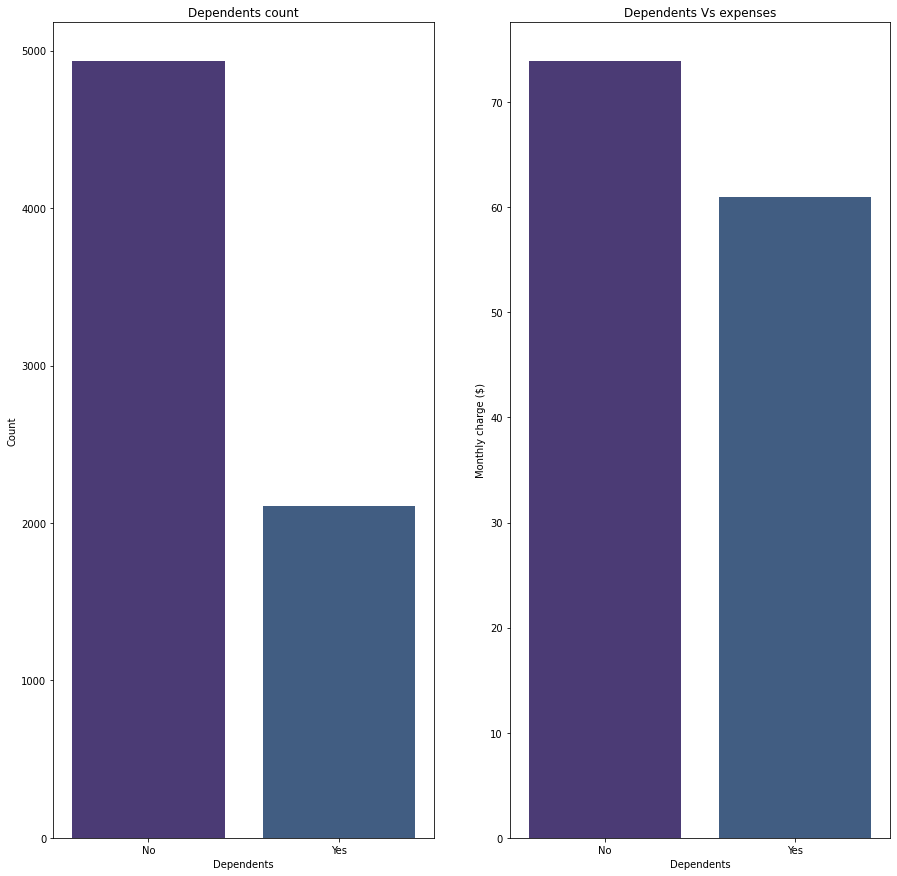

In [29]:
Dependents_count = df.groupby('Dependents').customerID.count().to_frame(name='Count').reset_index()
Dependents_charge = df.groupby('Dependents').MonthlyCharges.median().to_frame(name='Charges').reset_index()

fig, axs = plt.subplots(1, 2, figsize=(15, 15))

sns.barplot(x=Dependents_count['Dependents'], y=Dependents_count['Count'], ax=axs[0])
axs[0].set(title = 'Dependents count', xlabel='Dependents', ylabel='Count')

sns.barplot(x=Dependents_charge['Dependents'], y=Dependents_charge['Charges'], ax=axs[1])
axs[1].set(title = 'Dependents Vs expenses', xlabel='Dependents', ylabel='Monthly charge ($)')
plt.show()

If the client has dependents, they tend to expend less in telcom services.

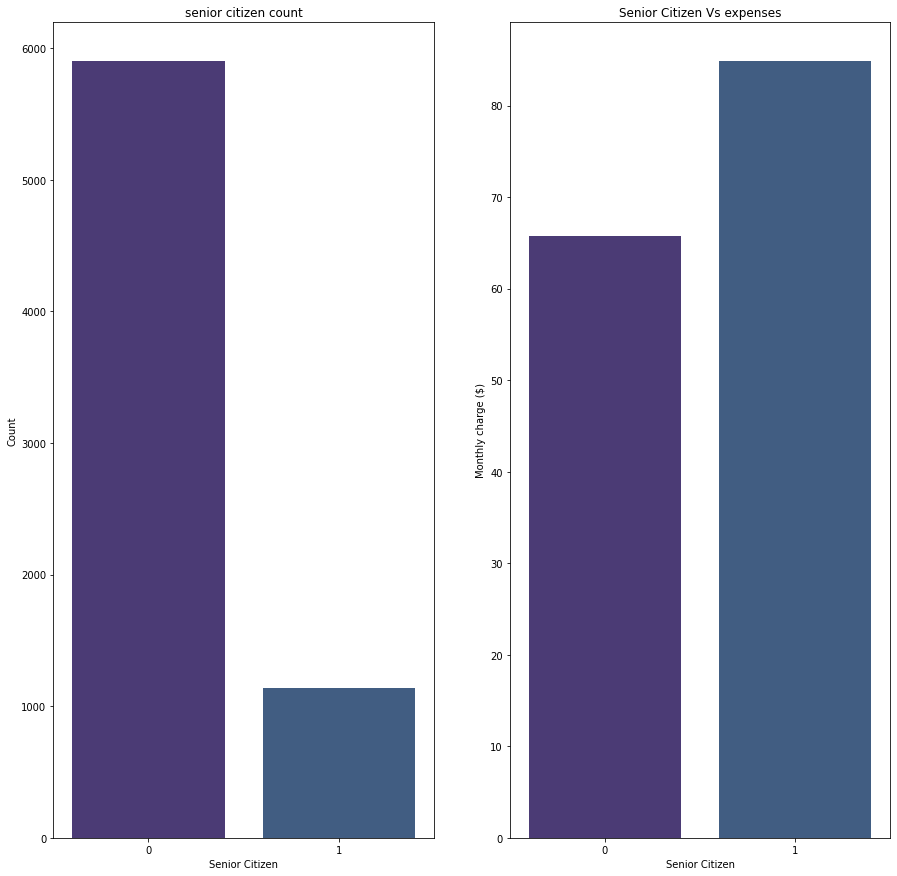

In [30]:
# Lets evaluate the same with Senior Citizens
SeniorCitizen_count = df.groupby('SeniorCitizen').customerID.count().to_frame(name='Count').reset_index()
SeniorCitizen_charge = df.groupby('SeniorCitizen').MonthlyCharges.median().to_frame(name='Charges').reset_index()

fig, axs = plt.subplots(1, 2, figsize=(15, 15))

sns.barplot(x=SeniorCitizen_count['SeniorCitizen'], y=SeniorCitizen_count['Count'], ax=axs[0])
axs[0].set(title = 'senior citizen count', xlabel='Senior Citizen', ylabel='Count')

sns.barplot(x=SeniorCitizen_charge['SeniorCitizen'], y=SeniorCitizen_charge['Charges'], ax=axs[1])
axs[1].set(title = 'Senior Citizen Vs expenses', xlabel='Senior Citizen', ylabel='Monthly charge ($)')
plt.show()

Senior citizens tend to expend more than 20% than yourger people. Finally, lets see how is the distribution for payment method and how much they tend to expend.

In [31]:
PaymentMethod_count = df.groupby('PaymentMethod').customerID.count().to_frame(name='Count').reset_index()
PaymentMethod_count['%'] = (PaymentMethod_count['Count']/(PaymentMethod_count['Count'].sum()))*100
PaymentMethod_count

,PaymentMethod,Count,%
0,Bank transfer (automatic),1544,21.922476
1,Credit card (automatic),1522,21.610109
2,Electronic check,2365,33.579441
3,Mailed check,1612,22.887974


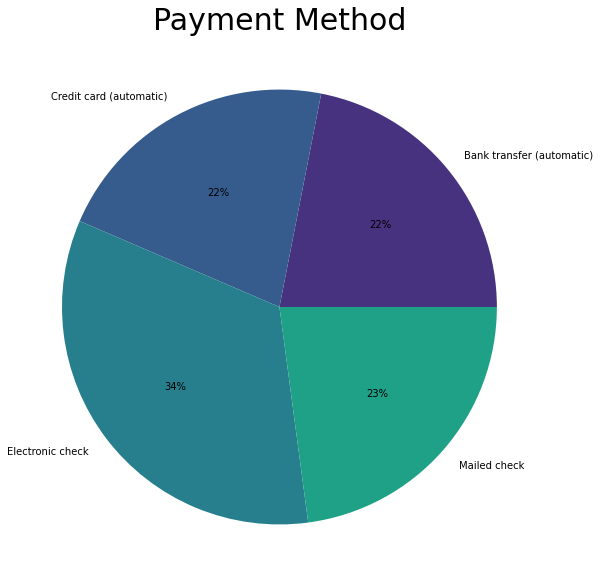

In [32]:
plt.figure(figsize=(15, 10))
data = PaymentMethod_count['%']
labels = PaymentMethod_count['PaymentMethod']
colors = sns.color_palette('viridis')[0:4]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Payment Method", fontsize = 30, fontweight = 20)
plt.show()

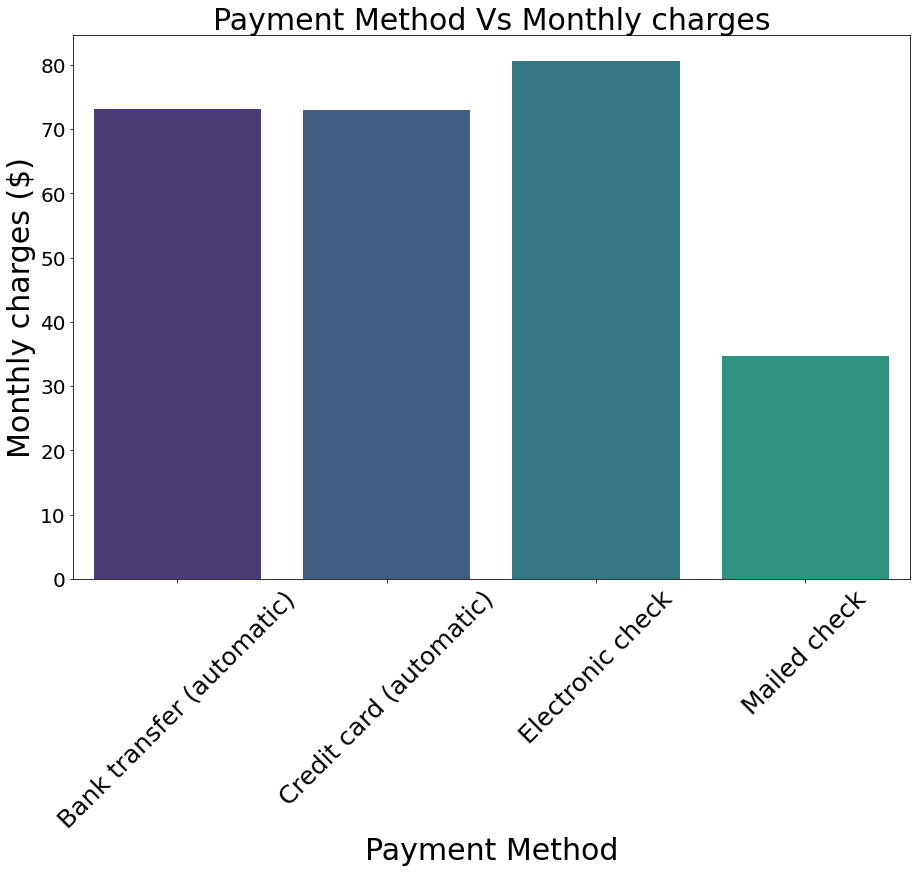

In [33]:
PaymentMethod_charge = df.groupby('PaymentMethod').MonthlyCharges.median().to_frame(name='Monthly charge').reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x=PaymentMethod_charge['PaymentMethod'], y=PaymentMethod_charge['Monthly charge'])
plt.title("Payment Method Vs Monthly charges", fontsize = 30, fontweight = 20)
plt.xlabel("Payment Method", fontsize = 30)
plt.ylabel('Monthly charges ($)', fontsize = 30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=25, rotation = 45)
plt.show()

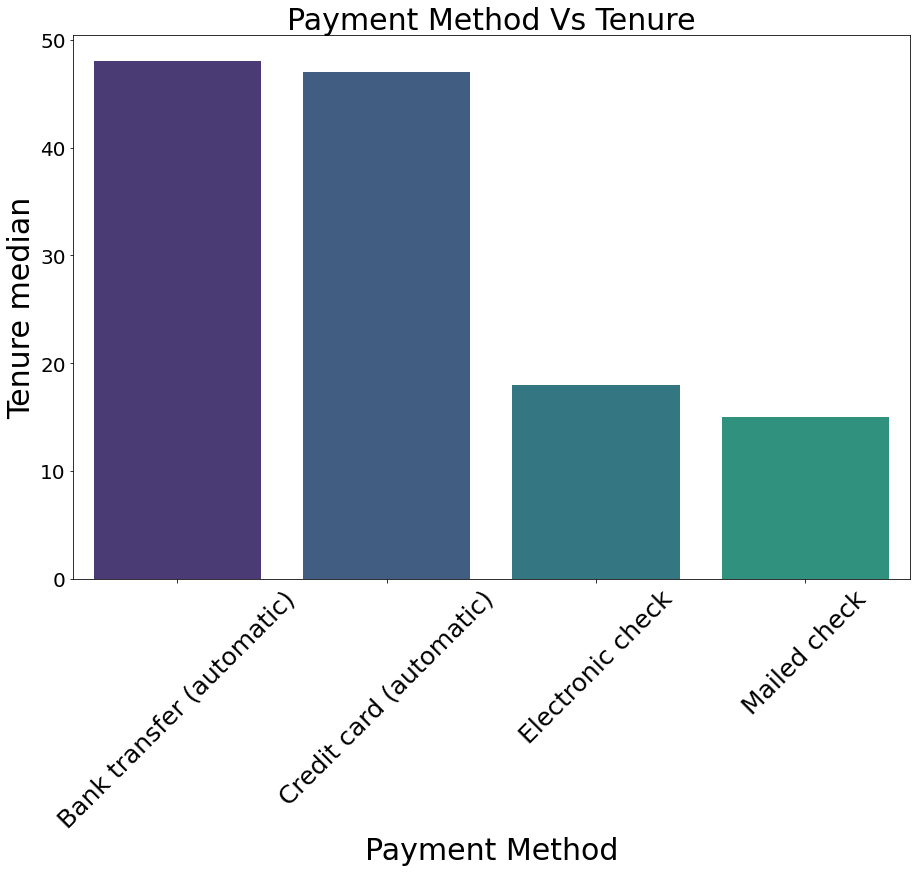

In [34]:
PaymentMethod_tenure = df.groupby('PaymentMethod').tenure.median().to_frame(name='Tenure median').reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x=PaymentMethod_tenure['PaymentMethod'], y=PaymentMethod_tenure['Tenure median'])
plt.title("Payment Method Vs Tenure", fontsize = 30, fontweight = 20)
plt.xlabel("Payment Method", fontsize = 30)
plt.ylabel('Tenure median', fontsize = 30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=25, rotation = 45)
plt.show()

### Now, we are going to analize the variables Vs their churn (if they stayed or left).

In [35]:
# First, we will substitute the values on the target variable: Yes will be 1, and No will be 0
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

### Demographics

In [36]:
# We will generate two different Dataframes: once for the clients that stayed, one for the clients that left
left = df.loc[(df.Churn == 1)].reset_index(drop=True)
stayed = df.loc[(df.Churn == 0)].reset_index(drop=True)

In [37]:
gender_left = left.groupby('gender').Churn.count().to_frame(name='Left').reset_index()
gender_stayed = stayed.groupby('gender').Churn.count().to_frame(name='Stayed').reset_index()

gender_churn = pd.merge(gender_left, gender_stayed, how = 'left', on='gender')
gender_churn['%'] = 100*(gender_churn['Left']/(gender_churn['Left']+gender_churn['Stayed']))

gender_churn

,gender,Left,Stayed,%
0,Female,939,2549,26.920872
1,Male,930,2625,26.160338


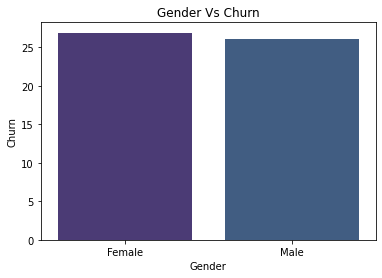

In [38]:
gender_plot = sns.barplot(x=gender_churn['gender'], y=gender_churn['%'])
gender_plot.set(title = 'Gender Vs Churn', xlabel='Gender', ylabel='Churn')
plt.show()

There is an easier way of doing this:

In [39]:
gender_churn = df[['gender','Churn']].groupby(['gender']).mean()
gender_churn['Churn'] = gender_churn['Churn']*100
gender_churn

,Churn
gender,
Female,26.920872
Male,26.160338


Gender variable has no impact on whether the client stay or leaves. Let's check on the other demographic variables.

In [40]:
senior_churn = df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()
senior_churn['Churn'] = senior_churn['Churn']*100

senior_churn

,Churn
SeniorCitizen,
0,23.606168
1,41.681261


In [41]:
Partner_churn = df[['Partner','Churn']].groupby(['Partner']).mean()
Partner_churn['Churn'] = Partner_churn['Churn']*100
Partner_churn

,Churn
Partner,
No,32.957979
Yes,19.664903


In [42]:
Dependents_churn = df[['Dependents','Churn']].groupby(['Dependents']).mean()
Dependents_churn['Churn'] = Dependents_churn['Churn']*100
Dependents_churn

,Churn
Dependents,
No,31.279140
Yes,15.450237


### <font color='#764BC8'>All demographic variables seems to have an impact on Churn, except for Gender.</font> 

### Services

In [43]:
# Phoneservice
PhoneService_churn = df[['PhoneService','Churn']].groupby(['PhoneService']).mean()
PhoneService_churn['Churn'] = Dependents_churn['Churn']*100
PhoneService_churn

,Churn
PhoneService,
No,3127.914048
Yes,1545.023697


In [44]:
MultipleLines_churn = df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()
MultipleLines_churn['Churn'] = MultipleLines_churn['Churn']*100
MultipleLines_churn

,Churn
MultipleLines,
No,25.044248
No phone service,24.926686
Yes,28.609896


In [45]:
InternetService_churn = df[['InternetService','Churn']].groupby(['InternetService']).mean()
InternetService_churn['Churn'] = InternetService_churn['Churn']*100
InternetService_churn

,Churn
InternetService,
DSL,18.959108
Fiber optic,41.892765
No,7.404980


In [46]:
OnlineSecurity_churn = df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()
OnlineSecurity_churn['Churn'] = OnlineSecurity_churn['Churn']*100
OnlineSecurity_churn

,Churn
OnlineSecurity,
No,41.766724
No internet service,7.404980
Yes,14.611194


In [47]:
OnlineBackup_churn = df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()
OnlineBackup_churn['Churn'] = OnlineBackup_churn['Churn']*100
OnlineBackup_churn

,Churn
OnlineBackup,
No,39.928756
No internet service,7.404980
Yes,21.531494


In [48]:
DeviceProtection_churn = df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()
DeviceProtection_churn['Churn'] = DeviceProtection_churn['Churn']*100
DeviceProtection_churn

,Churn
DeviceProtection,
No,39.127625
No internet service,7.404980
Yes,22.502064


In [49]:
TechSupport_churn = df[['TechSupport','Churn']].groupby(['TechSupport']).mean()
TechSupport_churn['Churn'] = TechSupport_churn['Churn']*100
TechSupport_churn

,Churn
TechSupport,
No,41.635474
No internet service,7.404980
Yes,15.166341


In [50]:
StreamingTV_churn = df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()
StreamingTV_churn['Churn'] = StreamingTV_churn['Churn']*100
StreamingTV_churn

,Churn
StreamingTV,
No,33.523132
No internet service,7.404980
Yes,30.070188


In [51]:
StreamingMovies_churn = df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()
StreamingMovies_churn['Churn'] = StreamingMovies_churn['Churn']*100
StreamingMovies_churn

,Churn
StreamingMovies,
No,33.680431
No internet service,7.404980
Yes,29.941435


### <font color='#764BC8'>For services, multiple lines and streaming have little influence on churn.</font> 

### Contract, billing and payment method

In [52]:
Contract_churn = df[['Contract','Churn']].groupby(['Contract']).mean()
Contract_churn['Churn'] = Contract_churn['Churn']*100
Contract_churn

,Churn
Contract,
Month-to-month,42.709677
One year,11.269518
Two year,2.831858


In [53]:
PaperlessBilling_churn = df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()
PaperlessBilling_churn['Churn'] = PaperlessBilling_churn['Churn']*100
PaperlessBilling_churn

,Churn
PaperlessBilling,
No,16.330084
Yes,33.565092


In [54]:
PaymentMethod_churn = df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()
PaymentMethod_churn['Churn'] = PaymentMethod_churn['Churn']*100
PaymentMethod_churn

,Churn
PaymentMethod,
Bank transfer (automatic),16.709845
Credit card (automatic),15.243101
Electronic check,45.285412
Mailed check,19.106700


### <font color='#764BC8'>All variables regarding this aspects seems to have and impact.</font>

### Charges and Tenure

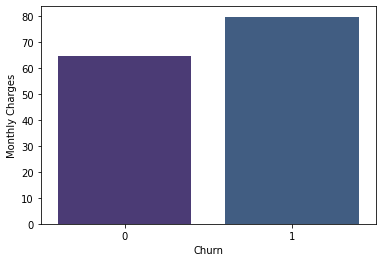

In [55]:
monthly = df.groupby('Churn').MonthlyCharges.median().to_frame(name='Monthly Charges').reset_index()

sns.barplot(x = monthly['Churn'], y = monthly['Monthly Charges'])
plt.show()

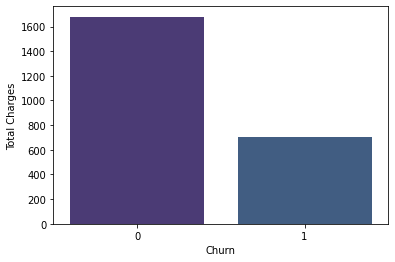

In [56]:
total = df.groupby('Churn').TotalCharges.median().to_frame(name='Total Charges').reset_index()

sns.barplot(x = total['Churn'], y = total['Total Charges'])
plt.show()

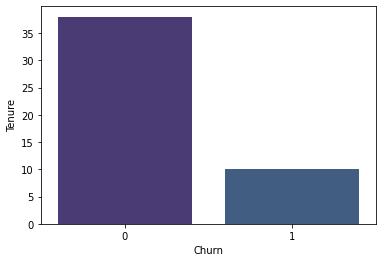

In [57]:
tenure = df.groupby('Churn').tenure.median().to_frame(name='Tenure').reset_index()

sns.barplot(x = tenure['Churn'], y = tenure['Tenure'])
plt.show()

### <font color='#764BC8'>Even though Total charges seems to have an impact on churn, it is heavily correlated to Tenure: the longer the commercial relationship last, the bigger is the accumulated payments. son it will be discarded.</font>

### The following variables won't be considered for the model:
   * customerID
   * gender
   * MultipleLines
   * StreamingTV
   * StreamingMovies
   * TotalCharges

## Prediction model

In [58]:
# Libraries
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb

# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [59]:
# Droping the variables that we wont use
df1 = df.drop(['customerID', 'gender', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'TotalCharges'], axis=1)
df1.shape

(7043, 15)

### Encoding and preprocessing

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [61]:
sc = MinMaxScaler()
a = sc.fit_transform(df1[['tenure']])
b = sc.fit_transform(df1[['MonthlyCharges']])
df1['tenure'] = a
df1['MonthlyCharges'] = b

In [62]:
# Dummyfication of our DataFrame
df_dummy = pd.get_dummies(df1, drop_first=True)
df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.115423,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,0.472222,0.385075,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
2,0,0.027778,0.354229,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,0,0.625000,0.239303,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0
4,0,0.027778,0.521891,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [63]:
df_dummy.shape

(7043, 23)

In [64]:
# Variables definition
X = df_dummy.drop(['Churn'], axis=1)
y = df_dummy.Churn

In [65]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Random Forest Classifier

[[1400  139]
 [ 291  283]]


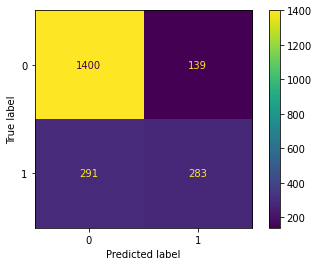

Precision Score: 0.6706161137440758
Accuracy Score: 0.79649787032655
Recall Score: 0.4930313588850174
F1 Score: 0.5682730923694779
AUC for our classifier is: 0.8499800766595804


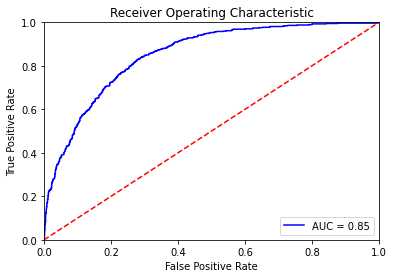

In [66]:
forest = RandomForestClassifier(n_estimators=100, max_depth=10)
forest.fit(X_train, y_train)

# Predictions
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_test_pred))

# Matrix plot
plot_confusion_matrix(forest, X_test, y_test)
plt.show()

print(f"Precision Score: {precision_score(y_test, y_test_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")

class_probabilities = forest.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-Nearest Neighbors

[[1325  214]
 [ 292  282]]


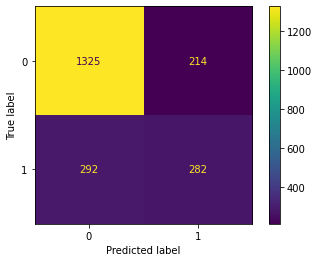

Precision Score: 0.5685483870967742
Accuracy Score: 0.7605300520586843
Recall Score: 0.4912891986062718
F1 Score: 0.5271028037383177
AUC for our classifier is: 0.7778173980570215


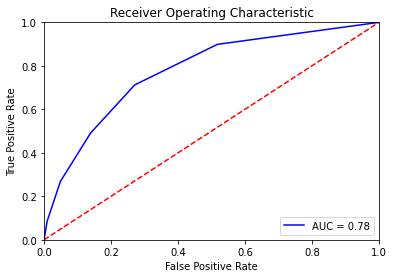

In [67]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_test_pred))

# Matrix plot
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

print(f"Precision Score: {precision_score(y_test, y_test_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")

class_probabilities = knn.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression

[[1118  421]
 [  98  476]]


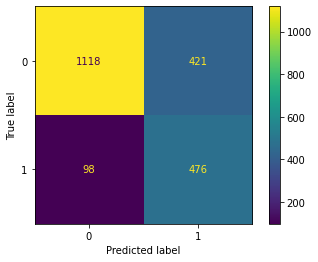

Precision Score: 0.5306577480490524
Accuracy Score: 0.7543776620918126
Recall Score: 0.8292682926829268
F1 Score: 0.6471787899388171
AUC for our classifier is: 0.8574122750417146


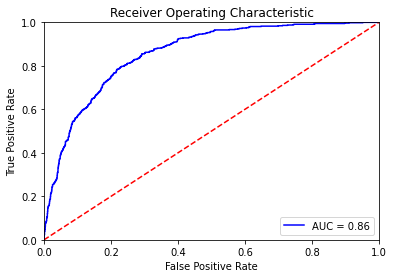

In [68]:
log = LogisticRegression(C=1.0,penalty='l2',random_state=42,solver="lbfgs",class_weight="balanced")
log.fit(X_train, y_train)

# Predictions
y_train_pred = log.predict(X_train)
y_test_pred = log.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_test_pred))

# Matrix plot
plot_confusion_matrix(log, X_test, y_test)
plt.show()

print(f"Precision Score: {precision_score(y_test, y_test_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")

class_probabilities = log.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost

[[1367  172]
 [ 278  296]]


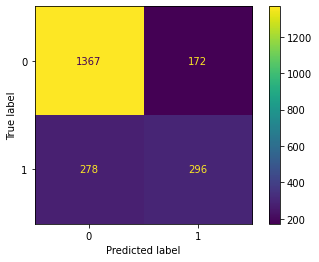

Precision Score: 0.6324786324786325
Accuracy Score: 0.7870326549929011
Recall Score: 0.5156794425087108
F1 Score: 0.5681381957773513
AUC for our classifier is: 0.8316800356808915


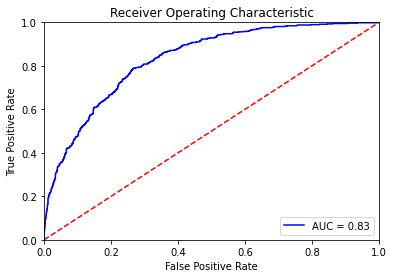

In [69]:
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)

y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)

#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(xgbc, X_test, y_test)
plt.show()

print(f"Precision Score: {precision_score(y_test, y_test_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")

class_probabilities = xgbc.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Hyperparameters and Crossvalidation

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [71]:
# Hyperparameters to evaluate
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 9)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
max_features.append(None)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 112, 125, 137, 150, 162, 175, 187, 200], 'max_features': ['auto', 'sqrt', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [72]:
# Model creation
rforest = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5)
rforest_hyper = RandomizedSearchCV(estimator = rforest, param_distributions = random_grid, n_iter = 100, cv = cv,
                                verbose=2, random_state=42, n_jobs = -1)
rforest_hyper.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 112, 125, 137,
                                                         150, 162, 175, 187,
                                                         200]},
                   random_state=42, verbose=2)

In [73]:
# Best params
rforest_hyper.best_params_

{'n_estimators': 187,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

[[1411  128]
 [ 286  288]]


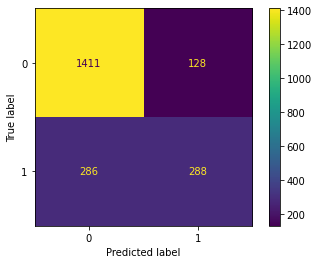

Precision Score: 0.6923076923076923
Accuracy Score: 0.804070042593469
Recall Score: 0.5017421602787456
F1 Score: 0.5818181818181818
AUC for our classifier is: 0.8541724682075559


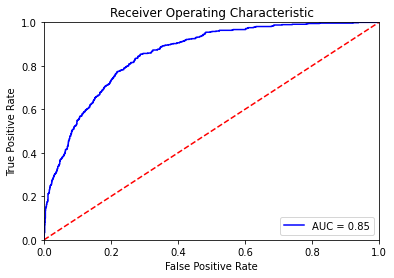

In [74]:
# Predictions
y_train_pred = rforest_hyper.predict(X_train)
y_test_pred = rforest_hyper.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_test_pred))

# Matrix plot
plot_confusion_matrix(rforest_hyper, X_test, y_test)
plt.show()

print(f"Precision Score: {precision_score(y_test, y_test_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")

class_probabilities = rforest_hyper.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### But, what if we oversample the class with less cases?

In [75]:
from imblearn.over_sampling import RandomOverSampler

In [76]:
over_sampler = RandomOverSampler(random_state=42)
X1, y1 = over_sampler.fit_resample(X, y)

<function matplotlib.pyplot.show(close=None, block=None)>

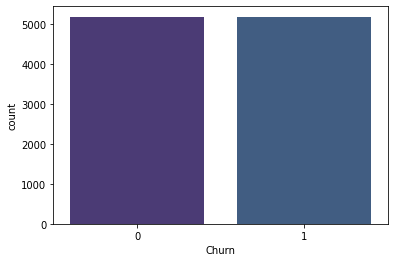

In [77]:
sns.countplot(y1)
plt.show

In [78]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

[[1311  263]
 [  86 1445]]


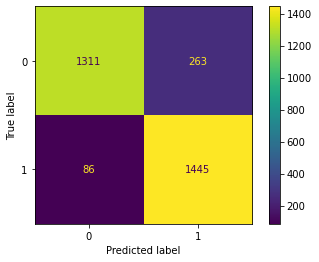

Test Precision Score: 0.8460187353629977
Accuracy Score: 0.8876006441223833
Recall Score: 0.9438275636838668
F1 Score: 0.8922506946588453
AUC for our classifier is: 0.9587728245650873


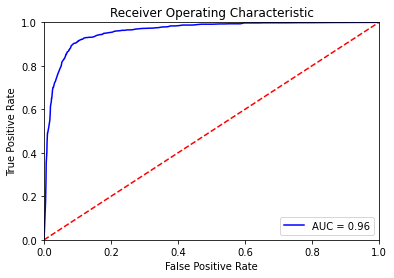

In [79]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# Predictions
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_test_pred))

# Matrix plot
plot_confusion_matrix(forest, X_test, y_test)
plt.show()

print(f"Test Precision Score: {precision_score(y_test, y_test_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")

class_probabilities = forest.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Let's add hyperparameters and cross-validation

In [80]:
# Model creation
rforest = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5)
rforest_hyper = RandomizedSearchCV(estimator = rforest, param_distributions = random_grid, n_iter = 100, cv = cv,
                                verbose=2, random_state=42, n_jobs = -1)
rforest_hyper.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 112, 125, 137,
                                                         150, 162, 175, 187,
                                                         200]},
                   random_state=42, verbose=2)

In [81]:
# Best params
rforest_hyper.best_params_

{'n_estimators': 175,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

[[1355  219]
 [ 103 1428]]


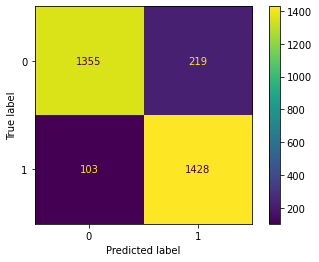

Precision Score: 0.8670309653916212
Accuracy Score: 0.8962962962962963
Recall Score: 0.9327237099934683
F1 Score: 0.8986784140969164
AUC for our classifier is: 0.9653181973230908


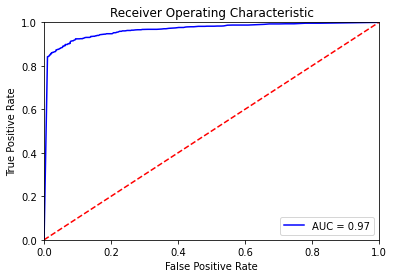

In [82]:
# Predictions
y_train_pred = rforest_hyper.predict(X_train)
y_test_pred = rforest_hyper.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_test_pred))

# Matrix plot
plot_confusion_matrix(rforest_hyper, X_test, y_test)
plt.show()

print(f"Precision Score: {precision_score(y_test, y_test_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")

class_probabilities = rforest_hyper.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()